In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

## Load Datasets

In [ ]:
# script lettura dataset
df = pd.read_csv('TrainingTSgrande.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df_test1 = pd.read_csv('ValidateTSgrande.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df_test2 = pd.read_csv('TestTSgrande.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

## Data Preparation

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df_test1['DateTime'] = pd.to_datetime(df_test1['DateTime'])
df_test2['DateTime'] = pd.to_datetime(df_test2['DateTime'])

In [ ]:
df['Weekday']=df['DateTime'].apply(lambda x:x.weekday())
df_test1['Weekday']=df_test1['DateTime'].apply(lambda x:x.weekday())
df_test2['Weekday']=df_test2['DateTime'].apply(lambda x:x.weekday())

df.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend,Weekday
0,2004-10-23 22:00:00,2.60000,1297.0,283.000000,89.000000,1725.0,20.3,1,5
1,2004-09-03 02:00:00,2.15275,944.0,246.896735,113.091251,1407.0,24.0,0,4
2,2004-10-07 20:00:00,7.00000,1757.0,669.000000,117.000000,2280.0,23.2,0,3
3,2004-10-20 07:00:00,2.15275,1522.0,246.896735,113.091251,2043.0,18.8,0,2
4,2004-10-22 06:00:00,1.00000,982.0,185.000000,55.000000,1435.0,19.8,0,4


In [ ]:
day1=df[df['Weekday']==0].copy()
day2=df[df['Weekday']==1].copy()
day3=df[df['Weekday']==2].copy()
day4=df[df['Weekday']==3].copy()
day5=df[df['Weekday']==4].copy()
day6=df[df['Weekday']==5].copy()
day7=df[df['Weekday']==6].copy()
    
weekdays_train = [day1,day2,day3,day4,day5,day6,day7]

day1_t1=df_test1[df_test1['Weekday']==0].copy()
day2_t1=df_test1[df_test1['Weekday']==1].copy()  
day3_t1=df_test1[df_test1['Weekday']==2].copy()
day4_t1=df_test1[df_test1['Weekday']==3].copy()
day5_t1=df_test1[df_test1['Weekday']==4].copy()
day6_t1=df_test1[df_test1['Weekday']==5].copy()
day7_t1=df_test1[df_test1['Weekday']==6].copy()
    
weekdays_test1 = [day1_t1,day2_t1,day3_t1,day4_t1,day5_t1,day6_t1,day7_t1]

day1_t2=df_test2[df_test2['Weekday']==0].copy()
day2_t2=df_test2[df_test2['Weekday']==1].copy() 
day3_t2=df_test2[df_test2['Weekday']==2].copy() 
day4_t2=df_test2[df_test2['Weekday']==3].copy()
day5_t2=df_test2[df_test2['Weekday']==4].copy()
day6_t2=df_test2[df_test2['Weekday']==5].copy()
day7_t2=df_test2[df_test2['Weekday']==6].copy()
    
weekdays_test2 = [day1_t2,day2_t2,day3_t2,day4_t2,day5_t2,day6_t2,day7_t2]

In [ ]:
day_l= []
day0_l=[]
day_t1_l=[]
day_t2_l= []
for day in weekdays_train:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day0_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)
        
for day in weekdays_test1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19])
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day_t1_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) 

for day in weekdays_test2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True) 
        day_l.append(ts)
        day_t2_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)

In [ ]:
split = 2 
part_size = 60 // split
day0_split = []
day_t1_split = []
day_t2_split = []

for ts in day0_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i    
        day0_split.append(day_div)
        
for ts in day_t1_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t1_split.append(day_div)
    
for ts in day_t2_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t2_split.append(day_div)

for day in day0_split:
    day.reset_index(drop=True, inplace=True) 
for day in day_t1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_t2_split:
    day.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Per analisi multivariata useremo gli attributi:
- CO(GT)
- NOx(GT)
- PT08.S1(CO)

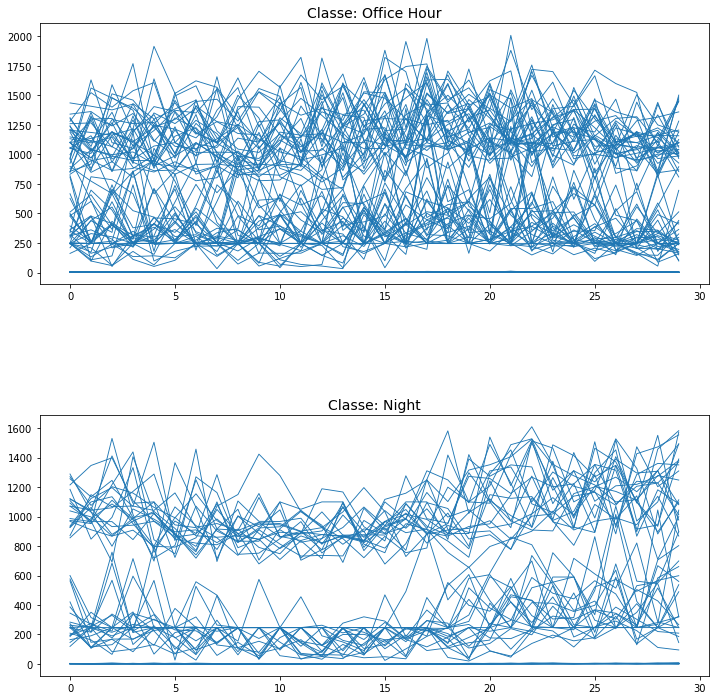

In [ ]:
ts_l= []
ts_arr = []

for i in day0_split:
    ts = i[['CO(GT)','NOx(GT)','PT08.S1(CO)']].copy()
    ts_l.append(ts)

ts_size = day0_split[0][['CO(GT)','NOx(GT)','PT08.S1(CO)']].shape
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))

X_train = np.array(ts_arr)

def divide_day(ts): 
     if ts['DateTime'][ts.index[ts_size[0]//2]].hour <= 19 and ts['DateTime'][ts.index[ts_size[0]//2]].hour >= 7:
        return 'Office Hour'
     else:
        return 'Night'
    
labels = np.array([divide_day(i) for i in day0_split])

y_train = preprocessing.LabelEncoder().fit_transform(labels)

plt.figure(figsize=(12,12))
for i, classe in enumerate(['Office Hour', 'Night']):
    plt.subplot(2, 1, i + 1)
    for x in X_train[labels == classe]:
        plt.plot(x, color='C0',linewidth=0.9)
    plt.title('Classe: {}'.format(classe), fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
ts_l = []
ts_arr = []

for i in day_t1_split:
    ts = i[['CO(GT)','NOx(GT)','PT08.S1(CO)']].copy()
    ts_l.append(ts)

ts_size = day_t1_split[0][['CO(GT)','NOx(GT)','PT08.S1(CO)']].shape
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))

X_test1 = np.array(ts_arr)
y_test1 = preprocessing.LabelEncoder().fit_transform(labels)

In [ ]:
ts_l = []
ts_arr = []

for i in day_t2_split:
    ts = i[['CO(GT)','NOx(GT)','PT08.S1(CO)']].copy()
    ts_l.append(ts)

ts_size = day_t2_split[0][['CO(GT)','NOx(GT)','PT08.S1(CO)']].shape
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
    
X_test2 = np.array(ts_arr)
y_test2 = preprocessing.LabelEncoder().fit_transform(labels)

In [ ]:
X_train.shape,X_test2.shape


((52, 30, 3), (14, 30, 3))

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test2 = le.transform(y_test2)

In [ ]:
n_timesteps, n_outputs, n_features = X_train.shape[1], len(np.unique(y_train)), X_train.shape[2] 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)
print("N. FEATURES: ", n_features)

TIMESTEPS:  30
N. LABELS:  2
N. FEATURES:  3


In [ ]:
pip install tslearn

     |████████████████████████████████| 778kB 5.5MB/s 


In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
def build_lstm2(n_timesteps, n_outputs, n_features):
    model = Sequential()
    model.add(LSTM(4, input_shape=(n_timesteps, n_features), return_sequences=True, 
                        kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    #1
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
    
    #3
    for _ in range(2):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.7))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
lstm2 = build_lstm2(n_timesteps, n_outputs, n_features)


In [ ]:
lstm2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 4)             128       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 4)             16        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 4)             0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 4)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 4)             144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 4)             16        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 4)             0

In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_lstm2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 15
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [ ]:
history_lstm2 = lstm2.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/20
9/9 [==============================] - 0s 55ms/step - loss: 0.4586 - accuracy: 0.7561 - val_loss: 0.7049 - val_accuracy: 0.3636
Epoch 2/20
9/9 [==============================] - 0s 52ms/step - loss: 0.4892 - accuracy: 0.7561 - val_loss: 0.7030 - val_accuracy: 0.3636
Epoch 3/20
9/9 [==============================] - 0s 52ms/step - loss: 0.5331 - accuracy: 0.7317 - val_loss: 0.6992 - val_accuracy: 0.3636
Epoch 4/20
9/9 [==============================] - 0s 51ms/step - loss: 0.4743 - accuracy: 0.7561 - val_loss: 0.6955 - val_accuracy: 0.3636
Epoch 5/20
9/9 [==============================] - 0s 51ms/step - loss: 0.4293 - accuracy: 0.8293 - val_loss: 0.6877 - val_accuracy: 0.6364
Epoch 6/20
9/9 [==============================] - 0s 50ms/step - loss: 0.5285 - accuracy: 0.7561 - val_loss: 0.6777 - val_accuracy: 0.7273
Epoch 7/20
9/9 [==============================] - 0s 51ms/step - loss: 0.4773 - accuracy: 0.7317 - val_loss: 0.6709 - val_accuracy: 0.6364
Epoch 8/20
9/9 [===========

Mi dice che non ho abbastanza sample per fare accuracy, ma è strano, anche se ha scremato ne ha [54,14], nonostante ciò si può vedere da sopra che accuracy raggiunta è di 0.78 alla 20esima epoca

In [ ]:
y_pred = np.argmax(lstm2.predict(X_test2), axis=1)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

ValueError: ignored